# Logistic Regression Exercise

Now it's your turn to implement logistic regression on a new data set. For this purpose we use the Titanic Dataset. It includes personal information of all passengers on the Titanic as well as they survived the sinking of the Titanic or died.

Here’s the **Data Dictionary** of the dataset:

- PassengerID: type should be integers

- Survived: survived or not

- Pclass: class of Travel of every passenger

- Name: the name of the passenger

- Sex: gender

- Age: age of passengers

- SibSp: No. of siblings/spouse aboard

- Parch: No. of parent/child aboard

- Ticket: Ticket number

- Fare: what Prices they paid

- Cabin: cabin number

- Embarked: the port in which a passenger has embarked.

        - C: Cherbourg , S: Southampton , Q: Queenstown


You will find the data in the data folder (it's a zip folder, so you first have to unzip it).


## What you should do:

- conduct a brief EDA to become familiar with the data
- use Logistic Regression to predict if a passenger died or not

## How to do it:

Time is short, so aim for the simplest viable product first:
1. Load the data

2. Separate features and target 

3. Split the data in train and test

3. Get a quick overview of the train data

4. Agree on a classification metric for the task 

5. Create a simple heuristic/educated guess for the classification first. This is called a "baseline model". It is used to compare more complex models later (in this case: logistic regression). You as a data scientist want to prove how much your work/ML could improve the business metric, therefore you need a baseline model for comparison. In some cases you want to improve on an already existing model in your company which would be your baseline model then. In other cases, there are typical baseline models used in the specific field. For other tasks, you have to come up with a simple but meaningful idea, how to classify the data based on your business understanding (EDA). A baseline model should follow Occam’s Razor principle: "A simple model is the best model". 
    - Example of a baseline model: 
    If the task is to classify cats and dogs, a baseline model could be: We classify every animal as cat if its weight < 5 kg, otherwise the animal is classified as a dog. (The value of 5 kg is an educated guess, based on our business understanding/EDA.) 

6. use one or two already numerical features to create a simple first model
    -  did it even beat your base model?

7. Now you can go through the data science lifecycle again and again:
    - clean the data better

    - get more insights with EDA

    - add more features

    - do feature engineering 
    
    and check if your work improves your model further!

8. Stop whenever time is up or you cannot improve your model any further.

This repo a solution to this problem. If you want to compare your final result with the result of this repo solution, choose **25** as random seed and a test size of 30% for your train test split.

In [55]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score



In [56]:
# loading the data
df = pd.read_csv("data/titanic.csv")
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [57]:
# Define features and target
x = df.drop(columns=['Survived'])
y = df.Survived

In [58]:
# Split the data in train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=15, shuffle=True, stratify=y)

# Check the shape of the data sets
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (668, 11)
y_train shape: (668,)
x_test shape: (223, 11)
y_test shape: (223,)


#### Get a quick overview of the train data


In [59]:
#are there any missing values?
df_train.isna().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          516
Embarked         2
Survived         0
dtype: int64

In [60]:
# Age is missing and is important (children survived more), dropping rows would throw away too much data

# I will impute with median age:

median_age = x_train['Age'].median()

x_train['Age'] = x_train['Age'].fillna(median_age)
x_test['Age'] = x_test['Age'].fillna(median_age)

In [61]:
#check if it worked:
x_train['Age'].isna().sum(), x_test['Age'].isna().sum()

(0, 0)

In [62]:
# The Cabin Feature has too many missing values, so I will drop it:
x_train = x_train.drop(columns=['Cabin'])
x_test = x_test.drop(columns=['Cabin'])

In [63]:
# Fill missing Embarked values with the mode

most_common_port = x_train['Embarked'].mode()[0]
most_common_port


'S'

In [64]:
x_train['Embarked'] = x_train['Embarked'].fillna(most_common_port)
x_test['Embarked'] = x_test['Embarked'].fillna(most_common_port)


In [65]:
#check if it worked:
x_train[['Embarked']].isna().sum(), x_test[['Embarked']].isna().sum()


(Embarked    0
 dtype: int64,
 Embarked    0
 dtype: int64)

In [66]:
x_train.isna().sum()


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [67]:
x_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

[Text(0, 0, 'died'), Text(1, 0, 'survived')]

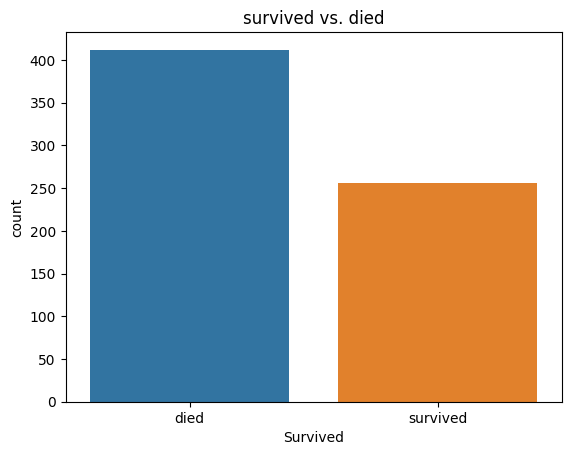

In [68]:

# Plotting the target variable
plt.title('survived vs. died')
ax = sns.countplot(x=y_train)
ax.set_xticklabels(['died', 'survived'])


Pairplots are only truly informative for continuous variables so this one is a bit redundant, I did it all the same. Ive decided to have a closer look afterwards only on Age & Fare

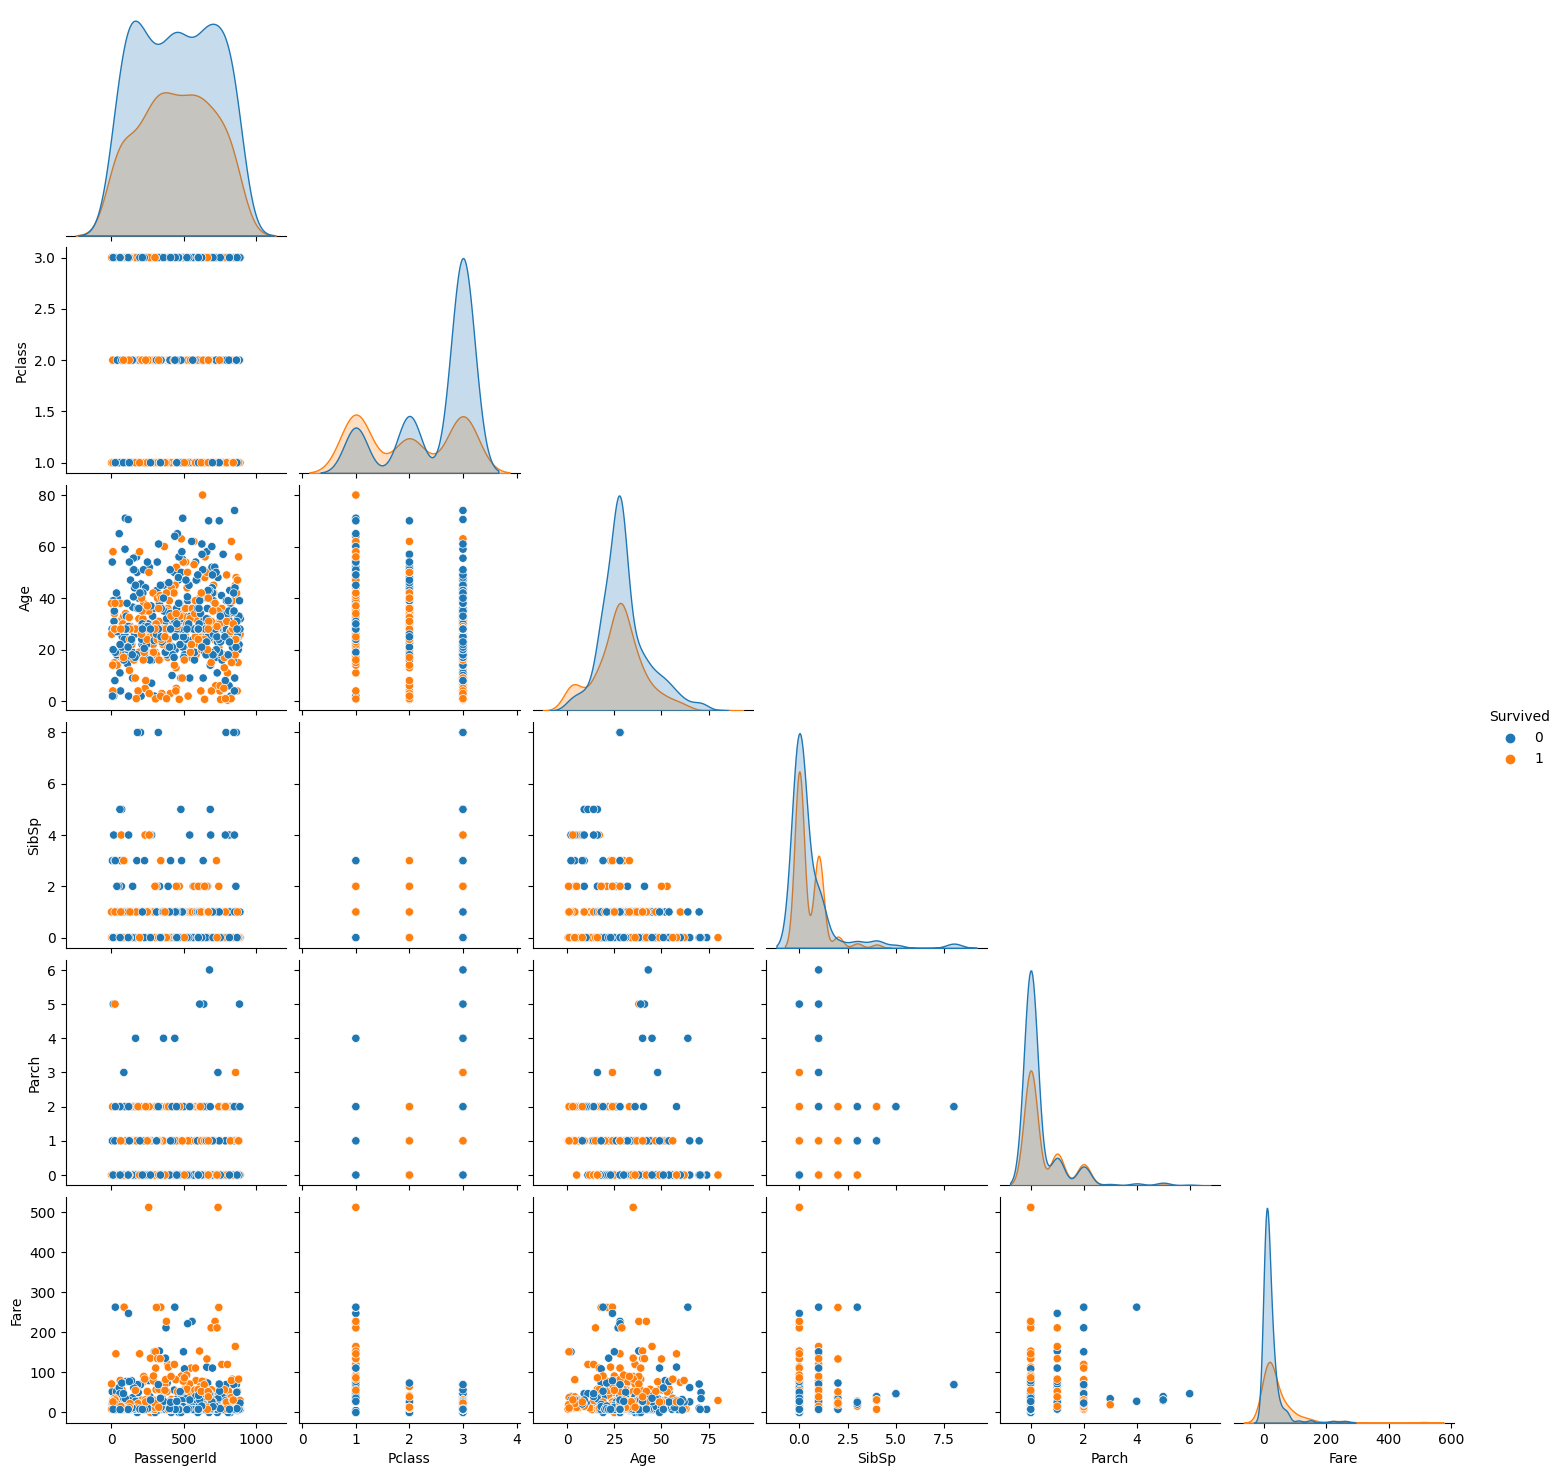

In [69]:
df_train = pd.concat([x_train,y_train], axis=1,ignore_index=False)
numeric_cols = df_train.select_dtypes(include='number')


sns.pairplot(numeric_cols, hue="Survived",corner=True);

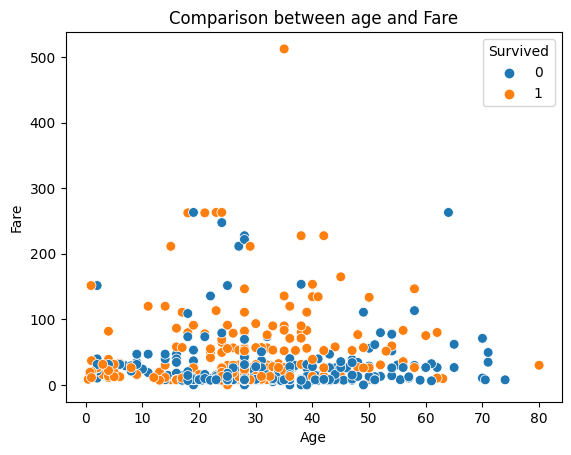

In [70]:
plt.title('Comparison between age and Fare')
sns.scatterplot(x=df_train['Age'], y=df_train['Fare'], hue = df_train['Survived'], s= 50);

more imporant - Categorical feature checks

[Text(0, 0, 'died'), Text(1, 0, 'survived')]

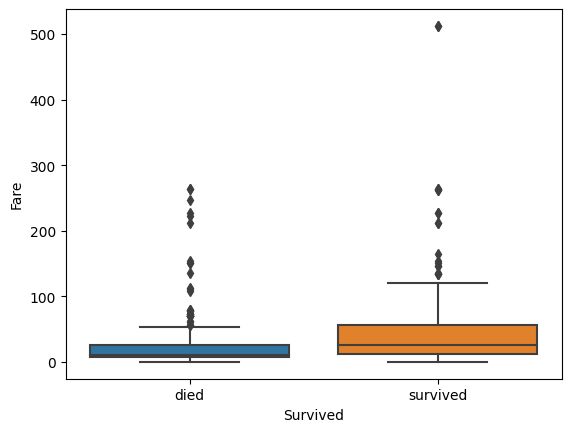

In [71]:
# Fare vs Survived
ax = sns.boxplot(x='Survived', y='Fare', data=df_train)
ax.set_xticklabels(['died', 'survived'])


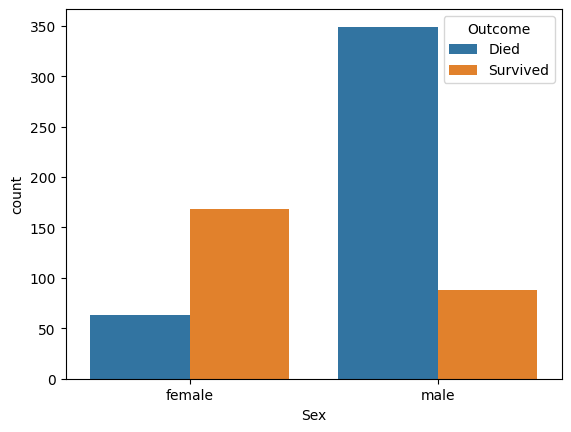

In [72]:

ax = sns.countplot(x='Sex', hue='Survived', data=df_train)

ax.legend(
    title='Outcome',
    labels=['Died', 'Survived'])

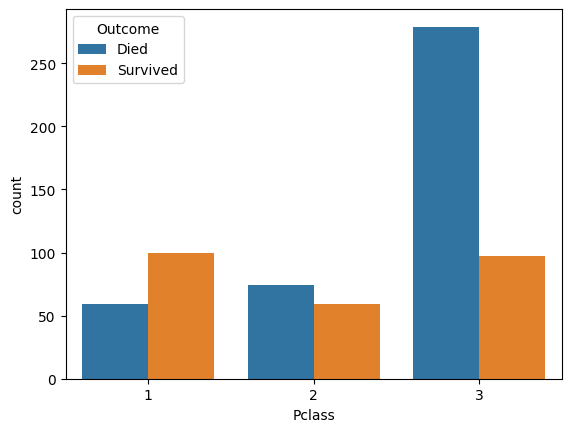

In [73]:
ax = sns.countplot(x='Pclass', hue='Survived', data=df_train)
ax.legend(
    title='Outcome',
    labels=['Died', 'Survived'])


In [74]:
embarked_survival = df_train.groupby('Embarked')['Survived'].mean().rename({
    'C': 'Cherbourg',
    'S': 'Southampton',
    'Q': 'Queenstown'
})


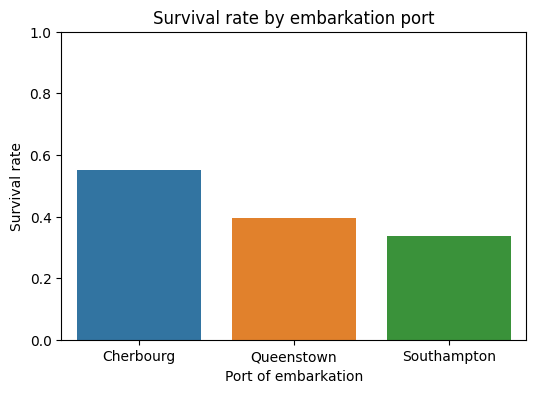

In [75]:
plt.figure(figsize=(6,4))
sns.barplot(
    x=embarked_survival.index,
    y=embarked_survival.values
)

plt.ylabel('Survival rate')
plt.xlabel('Port of embarkation')
plt.title('Survival rate by embarkation port')
plt.ylim(0, 1)

plt.show()


#### Agree on a classification metric for the task
| Metric            | Why                                       |
| ----------------- | ----------------------------------------- |
| Recall (Survived) | Don’t miss people who could be saved      |
| ROC AUC           | How well the model separates risk overall |
| F1                | Balanced, interpretable, standard         |


#### baseline model

As a baseline model, we use a simple rule based on gender. From the EDA we observed that women had a significantly higher survival rate than men. Therefore, the baseline classifier predicts survival for all female passengers and predicts death for all male passengers. This simple heuristic follows Occam’s Razor and provides a meaningful benchmark for evaluating more complex models.

In [76]:
x_test.Sex.unique()

array(['female', 'male'], dtype=object)

In [77]:
# Baseline prediction based on Sex
y_pred_baseline = x_test['Sex'].apply(lambda x: 1 if x == 'female' else 0)


In [78]:
# Confusion matrix for the baseline
from sklearn.metrics import confusion_matrix

cm_baseline = confusion_matrix(y_test, y_pred_baseline)
cm_baseline


array([[119,  18],
       [ 21,  65]], dtype=int64)

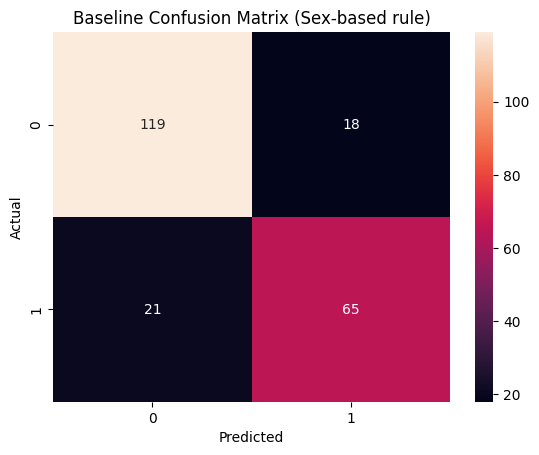

In [79]:
sns.heatmap(cm_baseline, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Baseline Confusion Matrix (Sex-based rule)')
plt.show()


In [80]:
# Evaluation metrics for the baseline

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("Accuracy:", accuracy_score(y_test, y_pred_baseline))
print("Precision:", precision_score(y_test, y_pred_baseline))
print("Recall:", recall_score(y_test, y_pred_baseline))
print("F1-score:", f1_score(y_test, y_pred_baseline))


Accuracy: 0.8251121076233184
Precision: 0.7831325301204819
Recall: 0.7558139534883721
F1-score: 0.7692307692307692


In [81]:
# ROC AUC for the baseline (important nuance)

roc_auc = roc_auc_score(y_test, y_pred_baseline)
print("ROC AUC:", roc_auc)


ROC AUC: 0.8122135460872517


As a baseline model, we use a simple rule based on passenger gender. Exploratory data analysis showed that female passengers had a significantly higher survival rate than male passengers. Therefore, the baseline classifier predicts survival for all female passengers and predicts death for all male passengers. This heuristic follows Occam’s Razor, is highly interpretable, and provides a meaningful benchmark against which more complex models such as logistic regression can be evaluated.

#### build a simple first model 

use one or two already numerical features to create a simple first model and check if it beat your base model?

In [82]:
# I chose the features Age and Fare as the 2 numerical features 
# (these are also the only continuous features)

X_train_af = x_train[['Age', 'Fare']]
X_test_af = x_test[['Age', 'Fare']]


In [83]:
from sklearn.linear_model import LogisticRegression

log_reg_af = LogisticRegression(max_iter=1000)
log_reg_af.fit(X_train_af, y_train)


LogisticRegression(max_iter=1000)

In [84]:
y_pred_af = log_reg_af.predict(X_test_af)


In [108]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("Age + Fare Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_af))
print("Precision:", precision_score(y_test, y_pred_af))
print("Recall:", recall_score(y_test, y_pred_af))
print("F1-score:", f1_score(y_test, y_pred_af))
print("ROC AUC:", roc_auc_score(y_test, y_pred_af))

roc_auc_af = roc_auc_score(y_test, y_pred_af)


Age + Fare Logistic Regression
Accuracy: 0.6681614349775785
Precision: 0.6875
Recall: 0.2558139534883721
F1-score: 0.3728813559322034
ROC AUC: 0.5914106263792226


The baseline dominates recall & F1 while the ML model is not yet competitive:

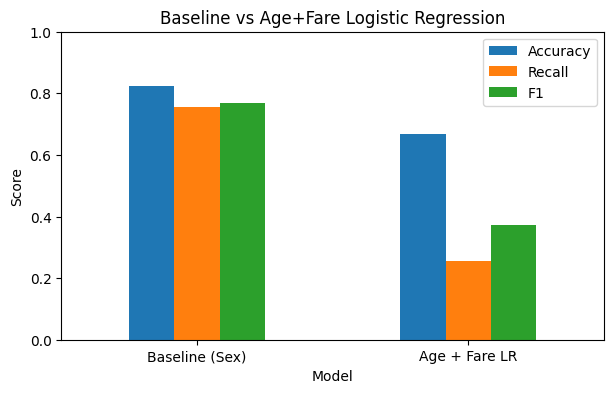

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

results = pd.DataFrame({
    'Model': ['Baseline (Sex)', 'Age + Fare LR'],
    'Accuracy': [0.825, 0.668],
    'Recall': [0.756, 0.256],
    'F1': [0.769, 0.373]
})

results.set_index('Model').plot(kind='bar', figsize=(7,4))
plt.title('Baseline vs Age+Fare Logistic Regression')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.show()


Conclusion here:
The heuristic baseline based on passenger gender outperforms the simple Age + Fare logistic regression model. This highlights the importance of feature selection and shows that machine learning models are not automatically superior to rule-based approaches if key predictive features are missing. The result motivates incorporating categorical variables such as gender in subsequent models.

#### add more features and improve the model

Now you can go through the data science lifecycle again and again:
    - clean the data better

    - get more insights with EDA

    - add more features

    - do feature engineering 
    
    and check if your work improves your model further!

#### First Itteration
1. Encode Sex
2. Create FamilySize
3. Select the full feature set
4. Train logistic regression
5. Compare against: baseline and Age+Fare model

In [87]:
# binary encoding of the sex column:_
# Sex_female = 1 → passenger is female
# Sex_female = 0 → passenger is male

x_train['Sex_female'] = (x_train['Sex'] == 'female').astype(int)
x_test['Sex_female'] = (x_test['Sex'] == 'female').astype(int)

#and dropping the original column:
x_train = x_train.drop(columns=['Sex'])
x_test = x_test.drop(columns=['Sex'])


In [88]:
# Create the engineered feature: FamilySize

# +1 is because we count also the passenger him/herself

x_train['FamilySize'] = x_train['SibSp'] + x_train['Parch'] + 1
x_test['FamilySize'] = x_test['SibSp'] + x_test['Parch'] + 1

In [91]:
# Select the final feature set
features = ['Age', 'Fare', 'Pclass', 'FamilySize', 'Sex_female']

X_train_final = x_train[features]
X_test_final = x_test[features]


In [92]:
# Train logistic regression
from sklearn.linear_model import LogisticRegression

log_reg_final = LogisticRegression(max_iter=1000)
log_reg_final.fit(X_train_final, y_train)


LogisticRegression(max_iter=1000)

In [93]:
# Predict on the test set

y_pred_final = log_reg_final.predict(X_test_final)


In [107]:
# Evaluate the improved model with the same metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("Improved Logistic Regression (Age + Fare + Sex + Pclass + FamilySize)")
print("Accuracy:", accuracy_score(y_test, y_pred_final))
print("Precision:", precision_score(y_test, y_pred_final))
print("Recall:", recall_score(y_test, y_pred_final))
print("F1-score:", f1_score(y_test, y_pred_final))
print("ROC AUC:", roc_auc_score(y_test, y_pred_final))

roc_auc_full = roc_auc_score(y_test, y_pred_final)


Improved Logistic Regression (Age + Fare + Sex + Pclass + FamilySize)
Accuracy: 0.8340807174887892
Precision: 0.7816091954022989
Recall: 0.7906976744186046
F1-score: 0.7861271676300577
ROC AUC: 0.8260057715158718


In [95]:
# inspect coefficients:

coef_df = pd.Series(
    log_reg_final.coef_[0],
    index=features
).sort_values(ascending=False)

coef_df

Sex_female    2.456095
Fare          0.001366
Age          -0.036036
FamilySize   -0.189525
Pclass       -1.007289
dtype: float64

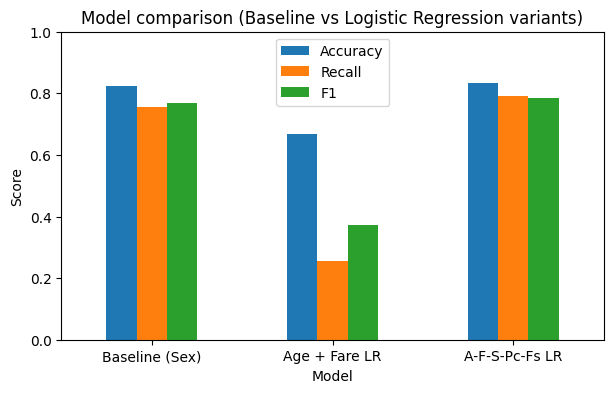

In [98]:
results = pd.DataFrame({
    'Model': ['Baseline (Sex)', 'Age + Fare LR', 'A-F-S-Pc-Fs LR'],
    'Accuracy': [0.825, 0.668, 0.834],
    'Recall': [0.756, 0.256, 0.791],
    'F1': [0.769, 0.373, 0.786]
})

results.set_index('Model').plot(kind='bar', figsize=(7,4))
plt.title('Model comparison (Baseline vs Logistic Regression variants)')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.show()

Adding key features + feature engineering improved performance.

In [100]:
# Lowering the threshold from 0.5 to 0.3 increases recall 
# (fewer false negatives) at the cost of lower precision 
# (more false positives), which may be preferable when missing 
# survivors is more costly than false alarms.”

y_prob = log_reg_final.predict_proba(X_test_final)[:, 1]

y_pred_03 = (y_prob >= 0.3).astype(int)

conf_matrix_03 = pd.crosstab(
    y_test,
    y_pred_03,
    rownames=['Actual'],
    colnames=['Predicted']
)

conf_matrix_03


Predicted,0,1
Actual,,
0,98,39
1,8,78


In [99]:
# compute metrics at threshold 0.3
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Threshold = 0.3")
print("Accuracy:", accuracy_score(y_test, y_pred_03))
print("Precision:", precision_score(y_test, y_pred_03))
print("Recall:", recall_score(y_test, y_pred_03))
print("F1:", f1_score(y_test, y_pred_03))

Threshold = 0.3
Accuracy: 0.7892376681614349
Precision: 0.6666666666666666
Recall: 0.9069767441860465
F1: 0.7684729064039408


In [101]:
# ROC AUC does not depend on a threshold, so when I evaluate ROC AUC I use y_prob, not y_pred_03:

from sklearn.metrics import roc_auc_score
print("ROC AUC:", roc_auc_score(y_test, y_prob))

ROC AUC: 0.9044304871838398


ROC AUC is a threshold-independent metric that measures how well a model separates the two classes across all decision thresholds. Therefore, it is well suited for comparing different probabilistic models. Comparing ROC AUC scores shows that the full logistic regression model improves class separability compared to the simpler Age + Fare model.

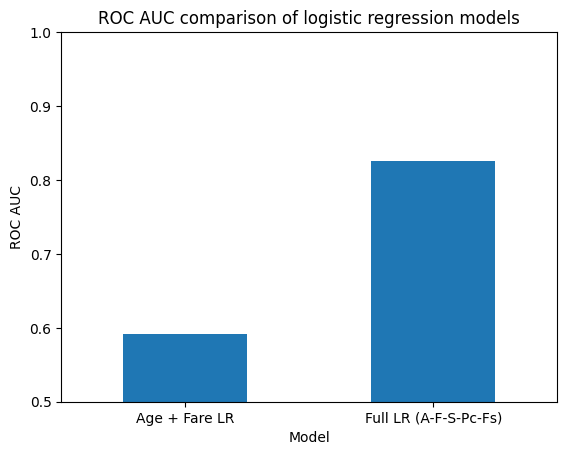

In [109]:
roc_results = pd.DataFrame({
    'Model': ['Age + Fare LR', 'Full LR (A-F-S-Pc-Fs)'],
    'ROC AUC': [roc_auc_af, roc_auc_full]
})

roc_results.set_index('Model').plot(kind='bar', legend=False)
plt.title('ROC AUC comparison of logistic regression models')
plt.ylabel('ROC AUC')
plt.ylim(0.5, 1)
plt.xticks(rotation=0)
plt.show()


In [106]:
print("roc_auc_af:", roc_auc_af, type(roc_auc_af))
print("roc_auc_full:", roc_auc_full, type(roc_auc_full))

roc_auc_af: <function roc_auc_score at 0x0000026787F216C0> <class 'function'>
roc_auc_full: <function roc_auc_score at 0x0000026787F216C0> <class 'function'>
